In [58]:
import pandas as pd
import numpy as np
import us

In [34]:
df = pd.read_csv("people_orgs.csv")
int_df = {"id": df["id"], "name": df["name"], "agency_slug": df["agency_slug"], "agency_name": df["name.1"], "agency_city": df["city"], "agency_state": df["state"], "slug_1": df["slug.1"]}
x = pd.DataFrame(int_df)
uniq = x["id"].unique()

In [95]:
print (x[x["name"] == "Daniel P. Walsh"])

         id             name         agency_slug agency_name agency_city  \
12603  2154  Daniel P. Walsh  white-house-office        None        None   
13077  2155  Daniel P. Walsh             defense        None        None   

      agency_state slug_1  
12603         None   None  
13077         None   None  


In [111]:
ds = pd.DataFrame(columns=x.columns)

count = 0
for index, row in x.iterrows():
    row_ex = {}
    for col in x.columns:
        row_ex[col] = row[col]
    if row_ex["name"] not in list(ds["name"]):
        ds.loc[count] = row_ex
        count += 1
    
#print (ds)

#print (ds["agency_state"])

In [112]:
unique_states = list(ds["agency_state"])

states_abvrs = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

states_full = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming", "District of Columbia"]

output = {}
for i in unique_states:
    if (i in states_abvrs) or (i in states_full):
        if i in output:
            output[i] += 1
        else:
            output[i] = 1

        
print (output)

{'Alabama': 14, 'DC': 83, 'Iowa': 7, 'Missouri': 8, 'Nebraska': 4, 'Utah': 5, 'Maryland': 33, 'District of Columbia': 305, 'Rhode Island': 3, 'California': 58, 'Tennessee': 7, 'Virginia': 184, 'VA': 38, 'Colorado': 11, 'Texas': 53, 'Georgia': 21, 'New Hampshire': 6, 'Connecticut': 6, 'TX': 9, 'Arkansas': 9, 'PA': 8, 'Pennsylvania': 29, 'North Carolina': 17, 'Florida': 46, 'New York': 72, 'South Carolina': 7, 'New Jersey': 13, 'Oklahoma': 17, 'Illinois': 34, 'Michigan': 12, 'Wisconsin': 7, 'Kansas': 6, 'Ohio': 15, 'Massachusetts': 6, 'Mississippi': 5, 'NY': 84, 'Vermont': 3, 'Arizona': 9, 'Washington': 13, 'Kentucky': 3, 'Indiana': 21, 'Louisiana': 9, 'Minnesota': 6, 'Idaho': 3, 'IN': 2, 'NJ': 24, 'Nevada': 10, 'Alaska': 4, 'CA': 11, 'NH': 1, 'MA': 3, 'NC': 2, 'MO': 2, 'MS': 1, 'Oregon': 2, 'Delaware': 4, 'KY': 2, 'MD': 4, 'CT': 2, 'OH': 9, 'North Dakota': 1, 'WA': 1, 'IA': 2, 'South Dakota': 1, 'West Virginia': 1, 'TN': 1, 'GA': 4, 'AK': 1, 'NE': 1, 'Montana': 1, 'IL': 1, 'LA': 1, 'Mai

In [126]:
common = []
for i in output:
    if output[i] > 10:
        common.append(i)
        
vals = []
for i in output:
    vals.append(output[i])
    
print (np.max(vals))

305


In [114]:
tp = []
good_states = []

for i in common:
    if len(i) > 2:
        good_states.append(i)

for i in common:
    if len(i) == 2:
        test = eval("us.states." + i + ".name")
        if test not in common:
            tp.append(i)
            
final = tp + good_states

if "DC" in final:
    final.remove("DC")
    final.append("District of Columbia")
print (final)

['Alabama', 'Maryland', 'District of Columbia', 'California', 'Virginia', 'Colorado', 'Texas', 'Georgia', 'Pennsylvania', 'North Carolina', 'Florida', 'New York', 'New Jersey', 'Oklahoma', 'Illinois', 'Michigan', 'Ohio', 'Washington', 'Indiana']


In [76]:
"""We want to know these people's backgrounds, what do they know to make decisions for 370 million. 
What is their work background, and what regions of the US do they have experience in?"""

"We want to know these people's backgrounds, what do they know to make decisions for 370 million. \nWhat is their work background, and what regions of the US do they have experience in?"

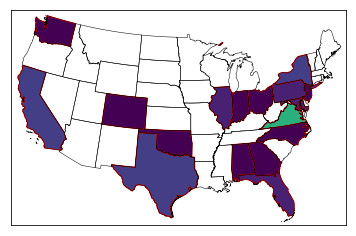

In [127]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib import cm

# create the map
mp = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

viridis = cm.get_cmap('viridis', 12)
mx = np.max(output.values)

# load the shapefile, use the name 'states'
mp.readshapefile('st99_d00', name='states', drawbounds=True)

# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in mp.states_info:
    state_names.append(shape_dict['NAME'])

ax = plt.gca() # get current axes instance

# get Texas and draw the filled polygon
for i in final:
    seg = mp.states[state_names.index(i)]
    poly = Polygon(seg, facecolor=viridis(output[i] / max(vals)),edgecolor='red')
    ax.add_patch(poly)

plt.show()